In [1]:
import pandas as pd
import numpy as np


import matplotlib
import matplotlib.pyplot as plt

plt.style.use("ggplot")
from matplotlib.pyplot import figure


import seaborn as sns

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)



In [2]:
df = pd.read_csv("/content/movies.csv")

In [3]:
df.head()



name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
df=df.dropna()    # dropping null values


In [5]:
for col in df.columns:
  missignPercent = np.mean(df[col].isnull()) #iterates over each columns as "col" holds column names
  print(f"{col} {missignPercent}")

name 0.0
rating 0.0
genre 0.0
year 0.0
released 0.0
score 0.0
votes 0.0
director 0.0
writer 0.0
star 0.0
country 0.0
budget 0.0
gross 0.0
company 0.0
runtime 0.0


In [6]:
# checking data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#Changing data types of budget and gross

df["budget"]=df["budget"].astype("int64")
df["gross"]=df["gross"].astype("int64")



<ipython-input-7-451c7b55facf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"]=df["budget"].astype("int64")
<ipython-input-7-451c7b55facf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gross"]=df["gross"].astype("int64")


In [8]:
#Show all the rows
pd.set_option("display.max_rows", None)

In [9]:
#Renaming columns
df =df.rename (columns ={"year":"yearcorrect"})
df

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
33                     Cattle Annie and Little Britches         PG      Drama   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
42                                        The Stunt Man          R     Action   
46                                           The Island          R     Action   
48                                        The Nude Bomb         PG     Action   
50                                    Stardust Memories         PG     Comedy   
51                                    Melvin and Howard          R     Comedy   
53                                         Bronco Billy         PG     Action   
56                                 When Time Ran Out...         PG     Action   
57                                      Oh Heavenly Dog         PG     Comedy   
58                                          The Octagon          R     Action   
75                        The Last Flight of Noah's Ark          G  Adventure   
77                                        Willie & Phil          R     Comedy   
80                                               Phobia          R      Drama   
92        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
94                       An American Werewolf in London          R     Comedy   
95                                 Escape from New York          R     Action   
96                                        The Evil Dead      NC-17     Horror   
97                                              Porky's          R     Comedy   
98                                             Blow Out          R      Crime   
99                                  Clash of the Titans         PG     Action   
100                                           Excalibur          R  Adventure   
101                                           Mad Max 2          R     Action   
1

In [10]:
# Sort the values in descending orde
df = df.sort_values(by =["gross"], inplace = False, ascending =False)


In [11]:
#Finding the correlated variables
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-11-dfa235ac896d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


yearcorrect     score     votes    budget     gross   runtime
yearcorrect     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score           0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes           0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget          0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross           0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime         0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

Text(120.72222222222221, 0.5, 'Movie Features')

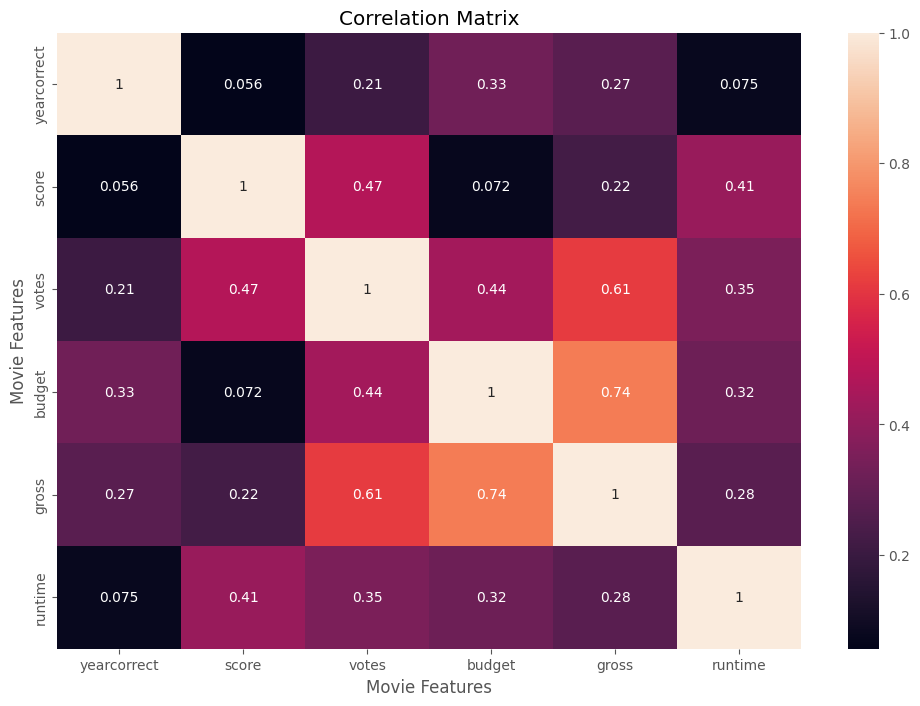

In [12]:
sns.heatmap(correlation_matrix, annot=True)
plt.title ("Correlation Matrix")
plt.xlabel ("Movie Features")
plt.ylabel("Movie Features")


Text(0, 0.5, 'Gross Income')

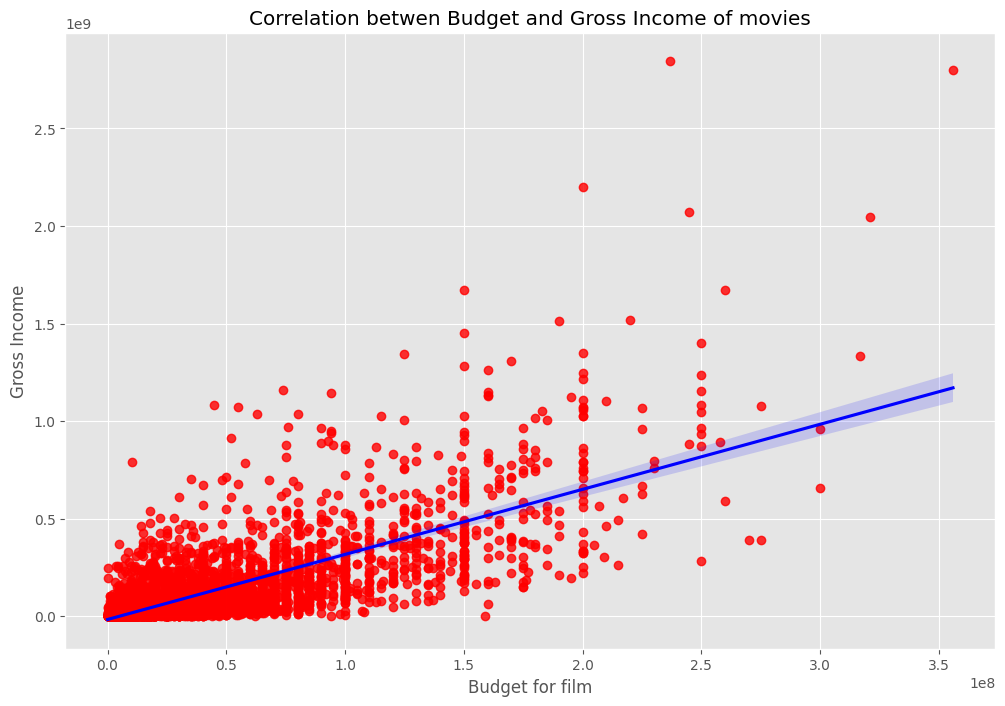

In [13]:
#Correlation betwen Budget and Gross Income of movies

sns.regplot(x= "budget", y ="gross", data =df , scatter_kws = {"color": "r"}, line_kws = {"color": "b"})
plt.title ("Correlation betwen Budget and Gross Income of movies")

plt.xlabel ("Budget for film")
plt.ylabel("Gross Income")

Text(0, 0.5, 'Gross Income')

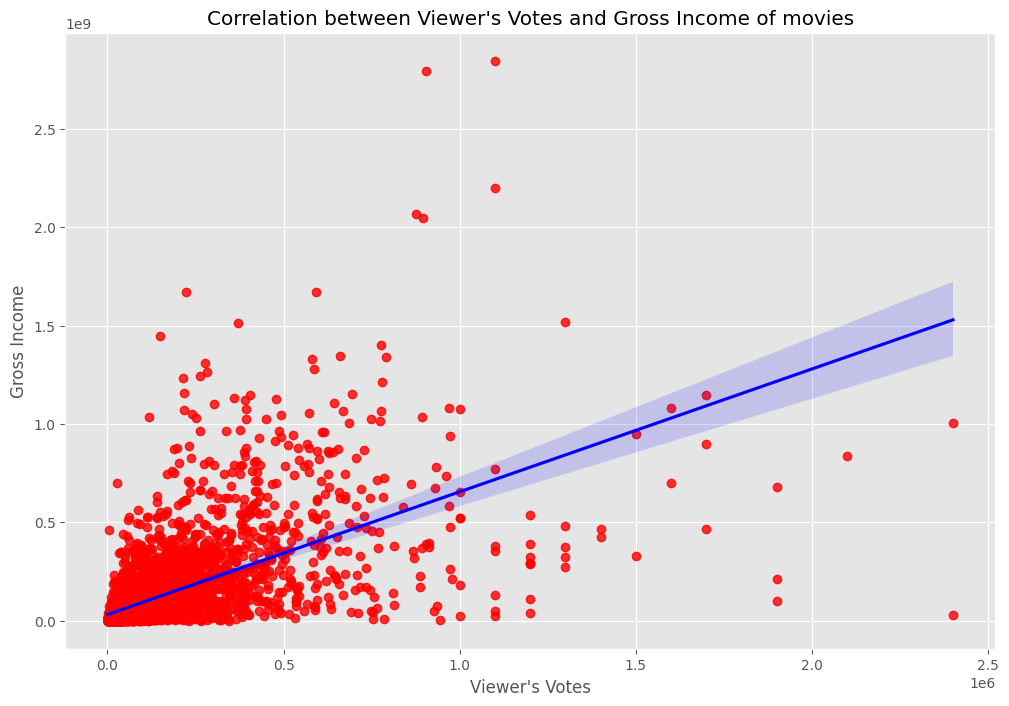

In [14]:

sns.regplot(x= "votes", y ="gross", data =df , scatter_kws = {"color": "r"}, line_kws = {"color": "b"})
plt.title ("Correlation between Viewer's Votes and Gross Income of movies")
plt.xlabel ("Viewer's Votes")
plt.ylabel("Gross Income")

In [15]:
df_numerized =df     # copying the original dataframe

for col in df_numerized.columns:
  print (col)

name
rating
genre
yearcorrect
released
score
votes
director
writer
star
country
budget
gross
company
runtime


In [16]:
for col in df_numerized.columns:
  if df_numerized[col].dtype == "object":
    df_numerized[col] = df_numerized[col].astype("category")  # converting what the column can hold, before assigning values of different data types
    df_numerized[col]=df_numerized[col].cat.codes


df_numerized.head()

name  rating  genre  yearcorrect  released  score      votes  director  \
5445   386       5      0         2009       527    7.8  1100000.0       785   
7445   388       5      0         2019       137    8.4   903000.0       105   
3045  4909       5      6         1997       534    7.8  1100000.0       785   
6663  3643       5      0         2015       529    7.8   876000.0       768   
7244   389       5      0         2018       145    8.4   897000.0       105   

      writer  star  country     budget       gross  company  runtime  
5445    1263  1534       47  237000000  2847246203     1382    162.0  
7445     513  1470       47  356000000  2797501328      983    181.0  
3045    1263  1073       47  200000000  2201647264     1382    194.0  
6663    1806   356       47  245000000  2069521700      945    138.0  
7244     513  1470       47  321000000  2048359754      983    149.0

Text(120.72222222222221, 0.5, 'Movie Features')

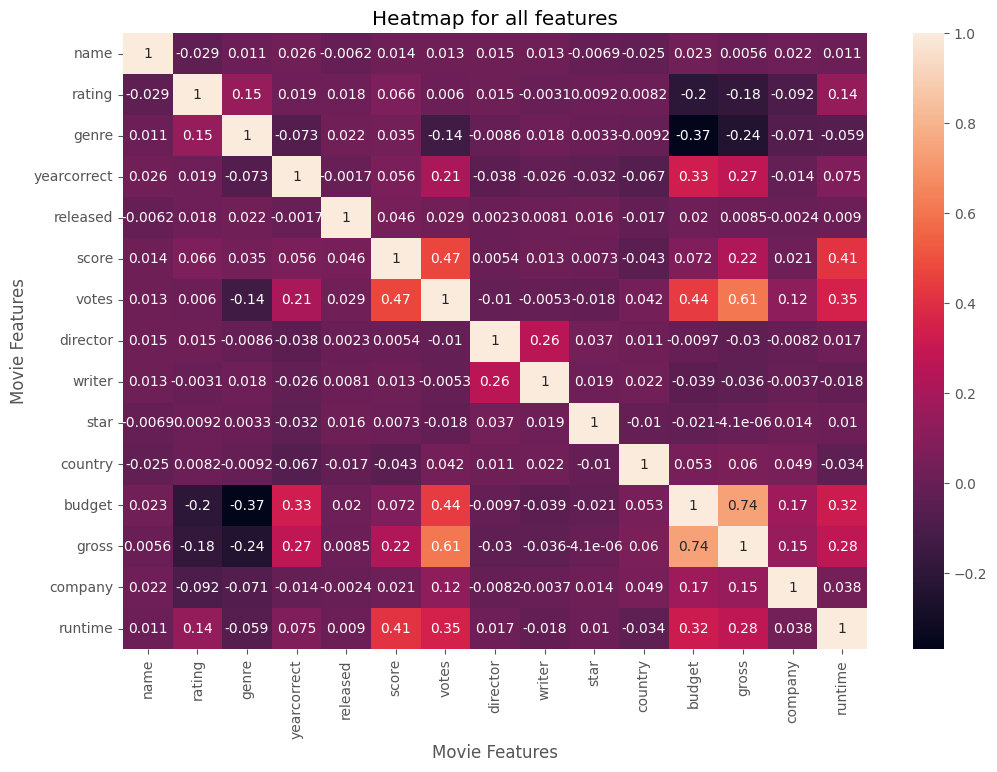

In [17]:
corrData =df_numerized.corr()
sns.heatmap(corrData, annot =True)
plt.title("Heatmap for all features")
plt.xlabel ("Movie Features")
plt.ylabel("Movie Features")

In [18]:
CorrNumerized =df_numerized.corr()

CorrPairs = CorrNumerized.unstack()

CorrPairs.sort_values(ascending=False)

name         name           1.000000
rating       rating         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
yearcorrect  yearcorrect    1.000000
genre        genre          1.000000
director     director       1.000000
runtime      runtime        1.000000
gross        budget         0.740247
budget       gross          0.740247
votes        gross          0.614751
gross        votes          0.614751
votes        score          0.474256
score        votes          0.474256
budget       votes          0.439675
votes        budget         0.439675
runtime      score          0.414068
score        runtime        0.414068
runtime      votes          0.352303
votes        runtime        0.352303
b

We can say that votes and budget had the **highest correlation** with Gross, while The **Production company** of the movie did **not** matter to the **Gross** income of the movies.